# Testing Snowplow Algorithm

In [1]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import params
from sectioning_streets import sectioning
from importlib import reload
%load_ext autoreload
%autoreload 2

Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [2]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [35]:
instance = "smallstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
     

Update depot

In [36]:
params.DEPOT = 0
params.DEPOT

0

Now reload all other modules for updated depot

In [37]:
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import dual_graphs
import pandas as pd
import construction
import shortest_paths
import crossover
import osmnx as ox
import genetic 
import solution 
import costs 
import plotting
import local_search
%load_ext autoreload
%autoreload 2

dual_graphs = reload(dual_graphs)
construction = reload(construction)
shortest_paths = reload(shortest_paths)
crossover = reload(crossover)
genetic = reload(genetic)
solution = reload(solution)
costs = reload(costs)
plotting = reload(plotting)
local_search = reload(local_search)

from shortest_paths import ShortestPaths
from crossover import apply_crossover
from genetic import run_genetic
from solution import Solution
from routes_representations import RouteStep
from costs import routes_cost
from params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



In [39]:
print(G)
print(G_DUAL)

MultiDiGraph with 51 nodes and 142 edges
MultiDiGraph with 143 nodes and 470 edges


In [40]:
sp = ShortestPaths(G_DUAL, False, True)

In [41]:
construction.process_node(G, 0, 1)

([(1,
   44,
   0,
   {'osmid': 758477398,
    'oneway': True,
    'highway': 'motorway_link',
    'reversed': False,
    'length': 14.069,
    'speed_kph': 44.3,
    'travel_time': 1.1,
    'priority': 3,
    'passes_rem': 2.0,
    'salt_per': 2.0,
    'serviced': False,
    'deadheading_passes': 0,
    'geometry': <LINESTRING (-89.514 43.097, -89.514 43.097)>}),
  (1,
   44,
   1,
   {'osmid': 758477398,
    'oneway': True,
    'highway': 'motorway_link',
    'reversed': False,
    'length': 14.069,
    'speed_kph': 44.3,
    'travel_time': 1.1,
    'priority': 3,
    'passes_rem': 2.0,
    'salt_per': 2.0,
    'serviced': False,
    'deadheading_passes': 0,
    'geometry': <LINESTRING (-89.514 43.097, -89.514 43.097)>})],
 4.1,
 4.1)

In [42]:
r, rreq = construction.route_generation(G, sp)


In [43]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


0 --> 41. (1) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 1). Next: (0, 41, 0). Route end: False
***
0 --> 41. (0) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 46, 0). Route end: False
11 --> 46. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (46, 0, 0). Route end: False
46 --> 0. (0) Salt value: 1

In [44]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

0 --> 41. (1) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 1). Next: (0, 41, 0). Route end: False
**
0 --> 41. (0) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 46, 0). Route end: False
11 --> 46. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (46, 0, 0). Route end: False
46 --> 0. (0) Salt value: 19

Test Local Search

In [45]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq), 0)

print(routes_cost(G, sp, S_first.routes))
for route in S_first.routes:
    for routestep in route:
        print(routestep)
    print("**")

47894.91999999998
0 --> 41. (1) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 1). Next: (0, 41, 0). Route end: False
**
0 --> 41. (0) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 46, 0). Route end: False
11 --> 46. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (46, 0, 0). Route end: False
46 --> 0. 

In [46]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, K, threshold=1)
print(routes_cost(G, sp, S_new.routes))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

61553.44000000002
0 --> 41. (1) Salt value: 20000. Prev: None. Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (0, 41, 1). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (53, 11, 0). Route end: False
53 --> 11. (0) Salt value: 19965.0. Prev: (45, 46, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19966.0. Prev: (53, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value: 19997.0. Prev: (11, 53, 0). Next: (6, 10, 0). Route end: False
6 --> 10. (0) Salt value: 19957.0. Prev: (53, 14, 1). Next: (10, 11, 0). Route end: False
10 --> 11. (0) Salt value: 19961.0. Prev: (6, 10, 0). Next: (11, 46, 0). Route end: False
11 --> 46. (0) Salt value: 19990.0. Prev: (10, 11, 0). Next: (10, 14, 0). Route end: False
10 --> 14. (0) Salt value: 19963.0. Prev: (11, 46, 0). Next: (10, 9, 0). Route end: False

In [47]:
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

0 --> 41. (1) Salt value: 20000. Prev: None. Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (0, 41, 1). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (53, 11, 0). Route end: False
53 --> 11. (0) Salt value: 19965.0. Prev: (45, 46, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19966.0. Prev: (53, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value: 19997.0. Prev: (11, 53, 0). Next: (6, 10, 0). Route end: False
6 --> 10. (0) Salt value: 19957.0. Prev: (53, 14, 1). Next: (10, 11, 0). Route end: False
10 --> 11. (0) Salt value: 19961.0. Prev: (6, 10, 0). Next: (11, 46, 0). Route end: False
11 --> 46. (0) Salt value: 19990.0. Prev: (10, 11, 0). Next: (10, 14, 0). Route end: False
10 --> 14. (0) Salt value: 19963.0. Prev: (11, 46, 0). Next: (10, 9, 0). Route end: False
10 --> 9. (0) Sal

In [48]:
s1, s1req = construction.route_generation(G, sp)
S1 = Solution(s1req, dict(), routes_cost(G, sp, s1req), 0)
S1 = local_search.local_improve(S1, G, sp, required_edges, K, threshold=1)

s2, s2req = construction.route_generation(G, sp)
S2 = Solution(s2req, dict(), routes_cost(G, sp, s2req), 0)
S2 = local_search.local_improve(S2, G, sp, required_edges, K, threshold=1)

In [49]:
S1.routes

[[44 --> 45. (0) Salt value: 19993.0. Prev: None. Next: (46, 0, 0). Route end: False,
  46 --> 0. (0) Salt value: 19978.0. Prev: (44, 45, 0). Next: (0, 41, 0). Route end: False,
  0 --> 41. (0) Salt value: 20000. Prev: (46, 0, 0). Next: (44, 0, 1). Route end: False,
  44 --> 0. (1) Salt value: 19993.0. Prev: (0, 41, 0). Next: (42, 41, 1). Route end: False,
  42 --> 41. (1) Salt value: 20000. Prev: (44, 0, 1). Next: (1, 44, 0). Route end: False,
  1 --> 44. (0) Salt value: 19995.0. Prev: (42, 41, 1). Next: (46, 11, 0). Route end: False,
  46 --> 11. (0) Salt value: 19991.0. Prev: (1, 44, 0). Next: (53, 20, 1). Route end: False,
  53 --> 20. (1) Salt value: 19920.0. Prev: (46, 11, 0). Next: (53, 11, 0). Route end: False,
  53 --> 11. (0) Salt value: 19921.0. Prev: (53, 20, 1). Next: (10, 6, 0). Route end: False,
  10 --> 6. (0) Salt value: 19931.0. Prev: (53, 11, 0). Next: (8, 40, 0). Route end: False,
  8 --> 40. (0) Salt value: 19984.0. Prev: (10, 6, 0). Next: (40, 8, 0). Route end: Fa

In [50]:
apply_crossover(G, sp, S1.routes, S2.routes)

[[44 --> 0. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  0 --> 41. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  1 --> 44. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  53 --> 11. (0) Salt value: 19956.0. Prev: (44, 0, 0). Next: (46, 0, 0). Route end: False,
  46 --> 0. (0) Salt value: 19929.0. Prev: (53, 11, 0). Next: (46, 45, 0). Route end: False,
  46 --> 45. (0) Salt value: 19930.0. Prev: (46, 0, 0). Next: (45, 46, 0). Route end: False,
  45 --> 46. (0) Salt value: 19933.0. Prev: (46, 45, 0). Next: (44, 45, 0). Route end: False,
  44 --> 45. (0) Salt value: 19934.0. Prev: (45, 46, 0). Next: (0, 41, 1). Route end: False,
  0 --> 41. (1) Salt value: 20000. Prev: (44, 45, 0). Next: (41, 1, 1). Route end: False,
  41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False,
  1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False,
  44 --> 0. (1) Salt value: 19993.0. Prev: (

In [51]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")

initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
53 --> 11. (0) Salt value: 0. Prev: None. Next: (46, 45, 0). Route end: False
46 --> 45. (0) Salt value: 0. Prev: (53, 11, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 0. Prev: (46, 45, 0). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 0. Prev: (44, 45, 0). Next: (46, 0, 0). Route end: False
46 --> 0. (0) Salt value: 0. Prev: (45, 46, 0). Next: (6, 10, 0). Route end: False
6 --> 10. (0) Salt value: 0. Prev: (46, 0, 0). Next: (10, 11

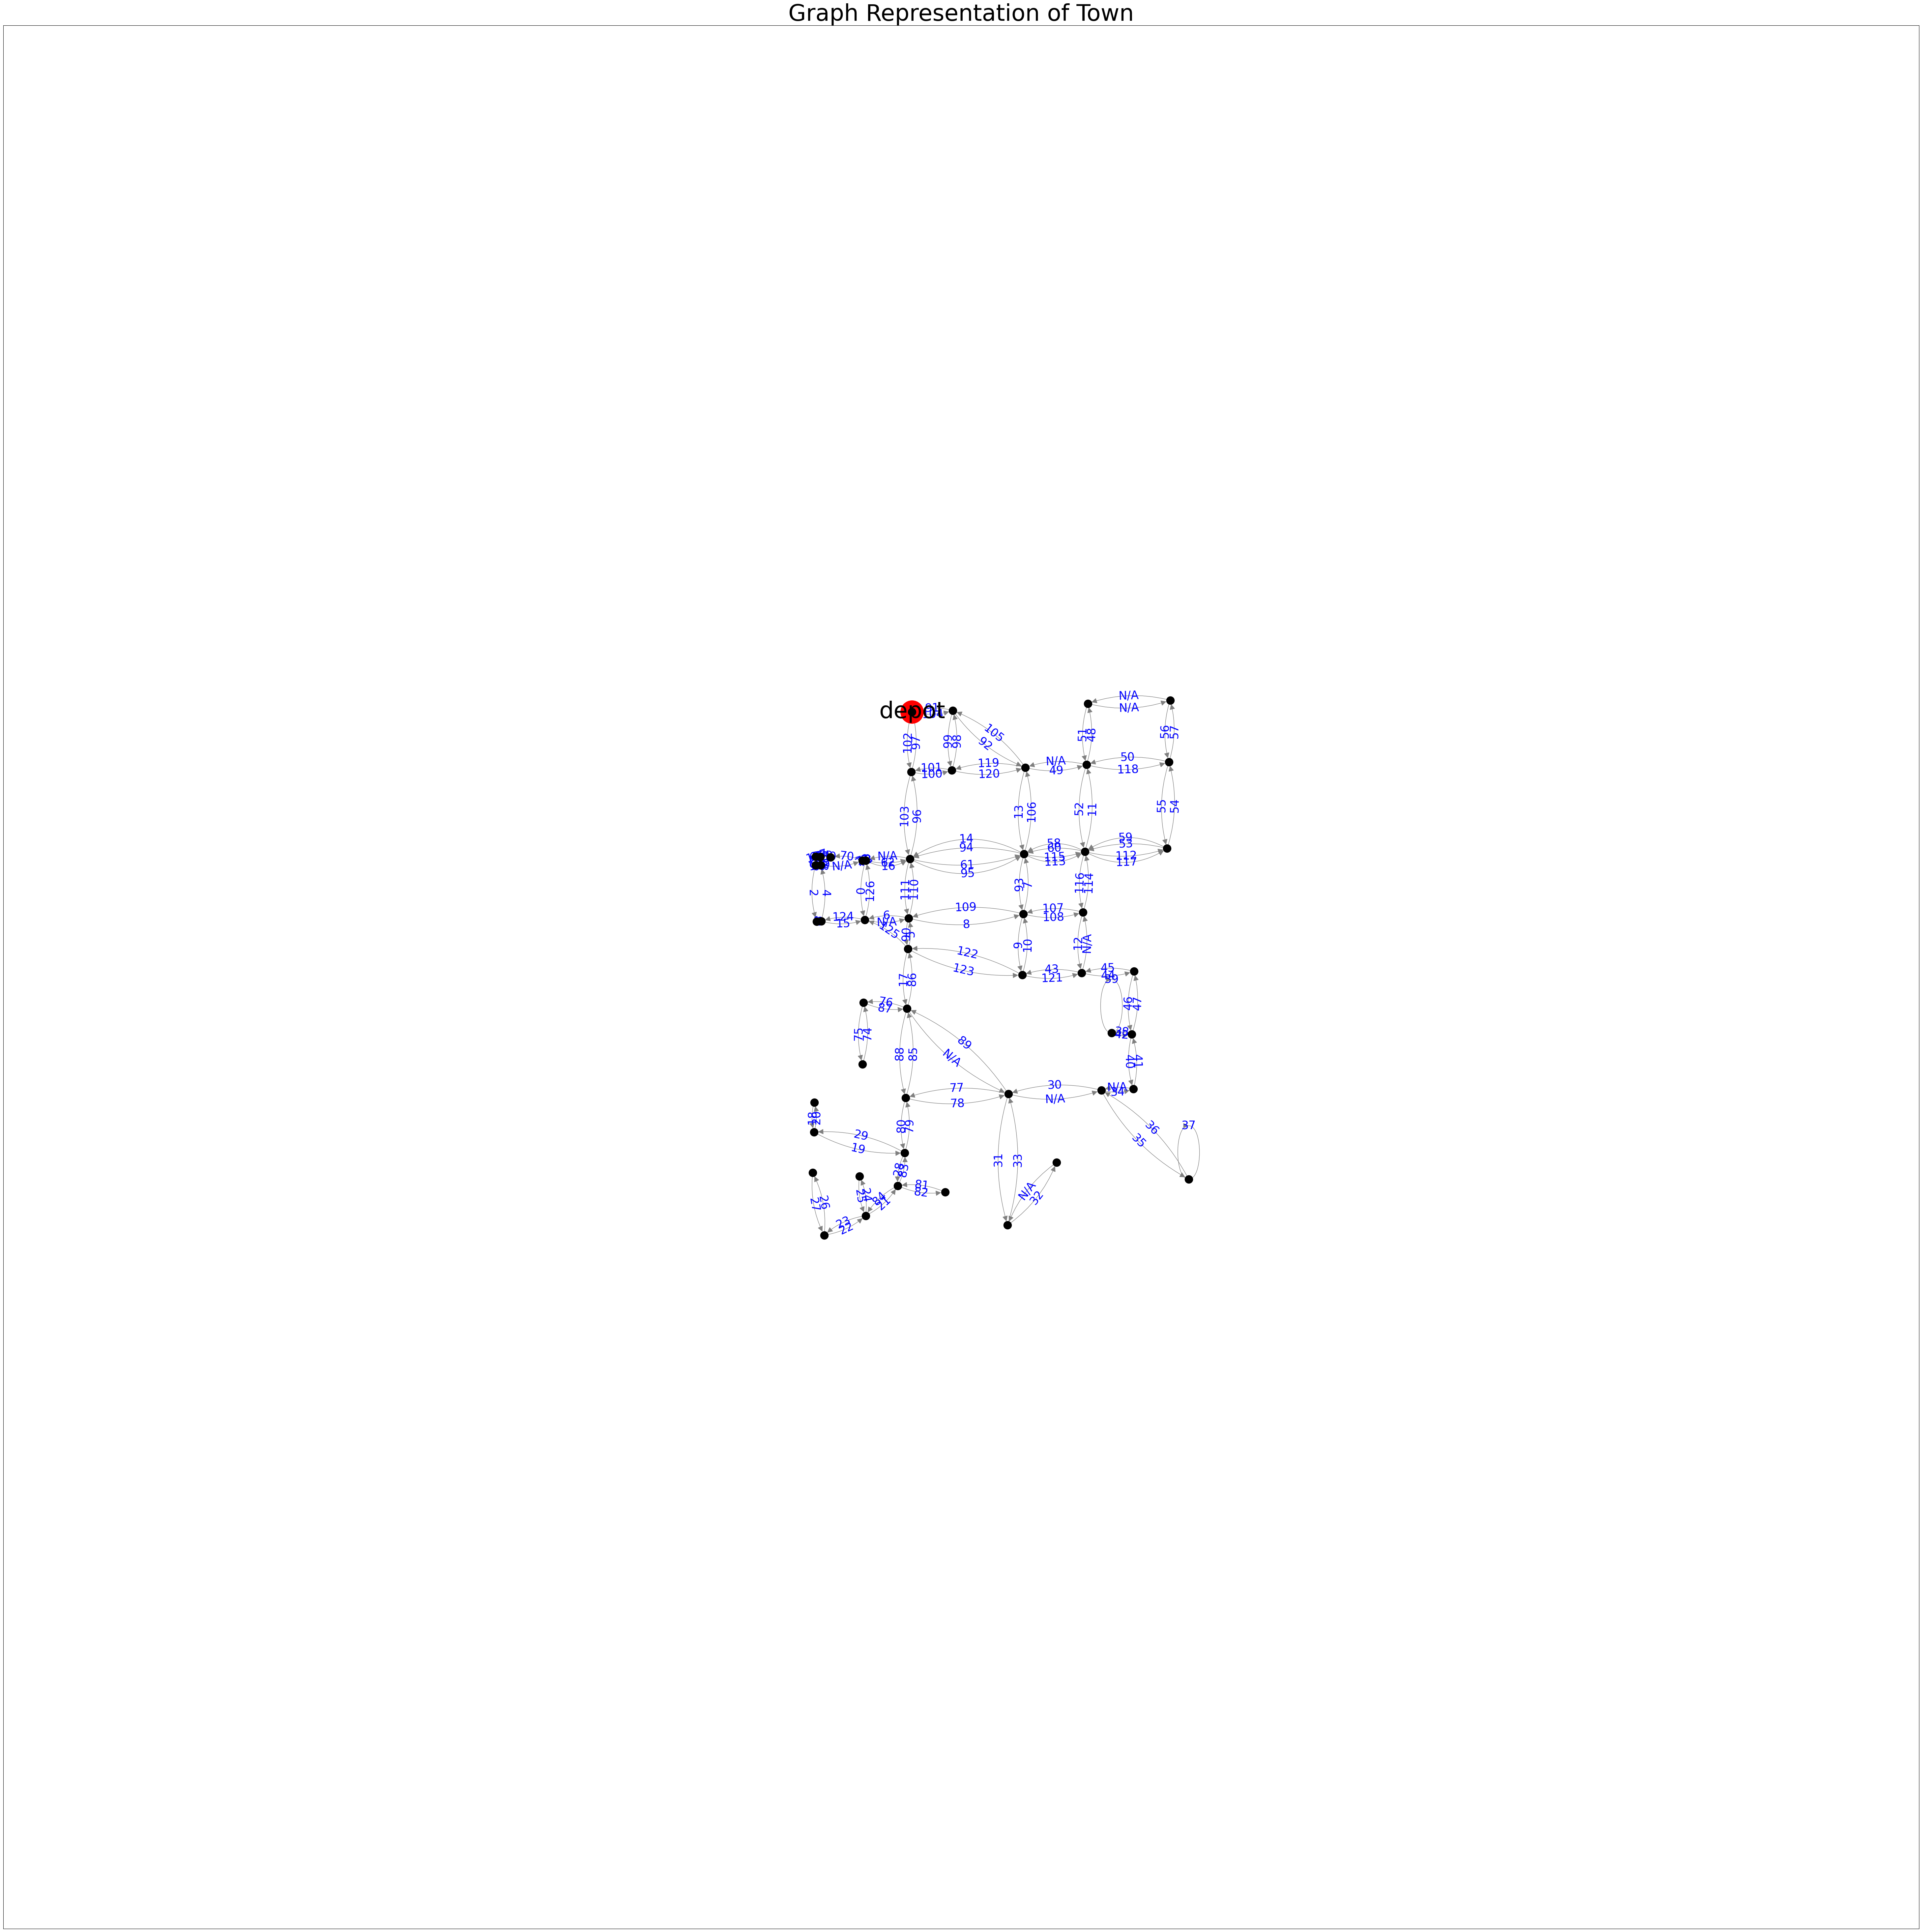

DONE
Routes cost 34284.880000000005


In [52]:

# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75), plotDepot=True)

print("DONE")
print("Routes cost", sol.cost)

## Plot the routes using Folium

In [55]:
import folium

In [56]:
def full_routes(sp: ShortestPaths, routes: list[list[RouteStep]]):
    full_route = list()
    for i in range(len(routes)):
        for j in range(len(routes[i])):
            step = routes[i][j]
            next_step = routes[i][j+1] if j+1 < len(routes[i]) else routes[i+1][0] if i+1 < len(routes) else None
            if next_step is not None:
                if step.node2 == next_step.node1:
                    full_route.append(step.get_edge())
                else:
                    path = sp.get_shortest_path(step.get_edge(), next_step.get_edge())
                    full_route.extend(path)
                    full_route.pop()
            else:
                full_route.append(step.get_edge())
    return full_route

In [57]:
full_route = full_routes(sp, sol.routes)
full_route

[(53, 11, 0),
 (11, 46, 0),
 (46, 45, 0),
 (45, 46, 0),
 (46, 0, 0),
 (0, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 45, 0),
 (45, 46, 0),
 (46, 0, 0),
 (0, 0, 0),
 (0, 20, 0),
 (20, 53, 0),
 (53, 14, 0),
 (14, 10, 0),
 (10, 6, 0),
 (6, 10, 0),
 (10, 11, 0),
 (11, 10, 0),
 (10, 9, 0),
 (9, 33, 0),
 (33, 14, 0),
 (14, 10, 0),
 (10, 9, 0),
 (9, 5, 0),
 (5, 9, 0),
 (9, 33, 0),
 (33, 32, 0),
 (32, 49, 0),
 (49, 32, 0),
 (32, 36, 0),
 (36, 4, 0),
 (4, 5, 0),
 (5, 9, 0),
 (9, 33, 0),
 (33, 48, 0),
 (48, 33, 0),
 (33, 14, 1),
 (14, 10, 0),
 (10, 11, 0),
 (11, 46, 0),
 (46, 11, 0),
 (11, 53, 0),
 (53, 14, 1),
 (14, 10, 0),
 (10, 6, 0),
 (6, 7, 0),
 (7, 15, 0),
 (15, 16, 0),
 (16, 38, 0),
 (38, 39, 0),
 (39, 38, 0),
 (38, 16, 0),
 (16, 38, 0),
 (38, 39, 0),
 (39, 38, 0),
 (38, 16, 0),
 (16, 17, 0),
 (17, 18, 0),
 (18, 17, 0),
 (17, 18, 0),
 (18, 19, 0),
 (19, 18, 0),
 (18, 19, 0),
 (19, 18, 0),
 (18, 29, 0),
 (29, 18, 0),
 (18, 19, 0),
 (19, 27, 0),
 (27, 19, 0),
 (19, 18, 0),
 (18, 17, 0),
 (17, 

In [59]:
m = ox.graph_to_gdfs(G, nodes=False).explore()
m

In [126]:
m.get_bounds()
import folium.plugins


In [130]:
def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = folium.DivIcon(
            icon_size=(1,1),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html=f"""<span class="fa-stack" style="font-size: 12pt text-align:center" >
                    <!-- The icon that will wrap the number -->
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {number}  
                    </strong>
                </span>"""
        )
    return icon
blue_hex = "#3186cc"
red_hex = "#FF0000"
new_m = folium.Map(location=[43.1, -89.5], zoom_start=12)
count = 0
for i, edge in enumerate(full_route):
    edge_data = G.get_edge_data(edge[0], edge[1], edge[2])
        
    if edge_data is not None:
            
        if i < len(full_route)-1:
            edge_data_next = G.get_edge_data(full_route[i+1][0], full_route[i+1][1], full_route[i+1][2])
            if edge_data_next is not None and "name" in edge_data_next and "name" in edge_data:
                if edge_data_next["name"] == edge_data["name"]:
                    continue
        lstring = edge_data['geometry']
        # swap long lat to lat long
        lstring = lstring.__class__([(y, x) for x, y in lstring.coords])
        midpoint = len(list(lstring.coords))//2
        icon_number = folium.plugins.BeautifyIcon(
            border_color="#00ABDC",
            border_width=1,
            text_color="#00ABDC",
            number=count,
            inner_icon_style="margin-top:2;",
        )
        folium.PolyLine(locations=lstring.coords, color='red', weight=1).add_to(new_m)
        folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=icon_number).add_to(new_m)

        # folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=folium.Icon(color="white", icon_color="white")).add_to(new_m)
        # folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=number_DivIcon(red_hex, count)).add_to(new_m)
        count += 1
new_m